In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import calendar
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
holiday = pd.read_parquet('data/holidays_events.parquet.gzip')
oil = pd.read_parquet('data/oil.parquet.gzip')
sample = pd.read_parquet('data/sample_submission.parquet.gzip')
store = pd.read_parquet('data/stores.parquet.gzip')
test = pd.read_parquet('data/test.parquet.gzip')
train = pd.read_parquet('data/train.parquet.gzip')
trans = pd.read_parquet('data/transactions.parquet.gzip')

In [3]:
df = pd.merge(train, holiday, on='date', how='left')
df = pd.merge(df, oil, on='date', how='left')
df = pd.merge(df, trans, on=['date','store_nbr'], how='left')
df = pd.merge(df, store, on='store_nbr', how='left')

In [4]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

In [6]:
df = df.rename(columns = {"type_x" : "type_holiday", "type_y" : "type_store"})

In [7]:
df.locale.value_counts()

National    261954
Local       208494
Regional     32076
Name: locale, dtype: int64

In [8]:
df.dtypes

id                       int64
date            datetime64[ns]
store_nbr                int64
family                  object
sales                  float64
onpromotion              int64
type_holiday            object
locale                  object
locale_name             object
description             object
transferred             object
dcoilwtico             float64
transactions           float64
city                    object
state                   object
type_store              object
cluster                  int64
year                     int64
month                    int64
weekday                 object
week                    UInt32
quarter                  int64
dtype: object

In [9]:
df.shape

(3054348, 22)

<AxesSubplot:xlabel='sales', ylabel='Count'>

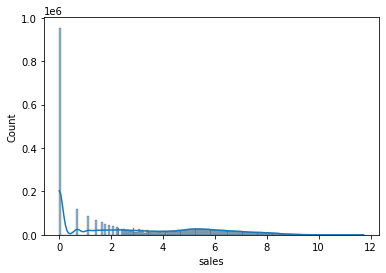

In [10]:
sns.histplot(np.log1p(df['sales']), kde=True)

In [11]:
# Increase in sales over time
df_total = df.groupby('date').sales.sum().squeeze().reset_index()
df_total = df_total.set_index('date')

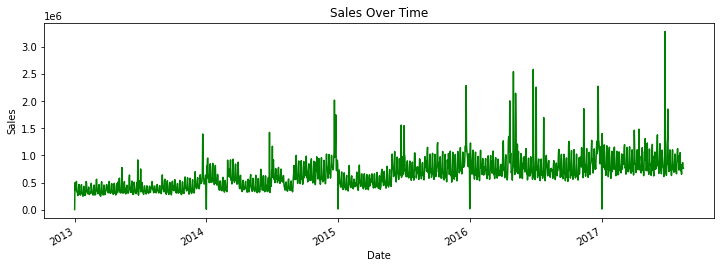

In [12]:
df_total.plot(legend=False, color='green', figsize=(12, 4))
plt.title('Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

In [13]:
df.state.value_counts()

Pichincha                         1074678
Guayas                             622182
Santo Domingo de los Tsachilas     169686
Azuay                              169686
Manabi                             169686
Cotopaxi                           113124
Tungurahua                         113124
Los Rios                           113124
El Oro                             113124
Chimborazo                          56562
Imbabura                            56562
Bolivar                             56562
Pastaza                             56562
Santa Elena                         56562
Loja                                56562
Esmeraldas                          56562
Name: state, dtype: int64

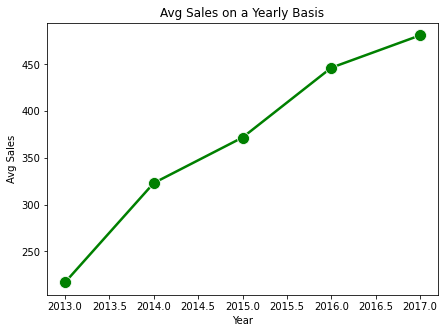

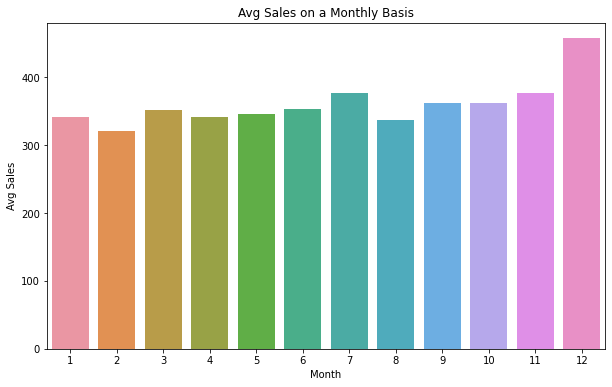

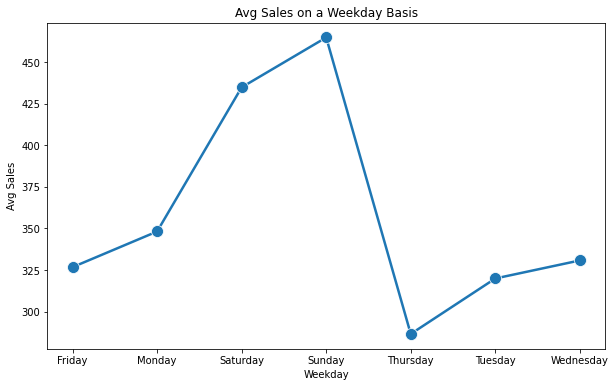

In [14]:
# Calculate the net sales on a yearly basis
yearly_sales = df.groupby('year')['sales'].mean().reset_index()
monthly_sales = df.groupby('month')['sales'].mean().reset_index()
weekday_sales = df.groupby('weekday')['sales'].mean().reset_index()

yearly_sales
# Plot a bar chart of the net sales on a yearly basis
plt.figure(figsize=(7, 5))
sns.lineplot(x='year', y='sales', data=yearly_sales, marker='o',linewidth=2.5,markersize=12,color='green')
plt.title('Avg Sales on a Yearly Basis')
plt.xlabel('Year')
plt.ylabel('Avg Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='sales', data=monthly_sales)
plt.title('Avg Sales on a Monthly Basis')
plt.xlabel('Month')
plt.ylabel('Avg Sales')
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x='weekday', y='sales', data=weekday_sales,marker ='o',linewidth=2.5,markersize=12,)
plt.title('Avg Sales on a Weekday Basis')
plt.xlabel('Weekday')
plt.ylabel('Avg Sales')
plt.show()

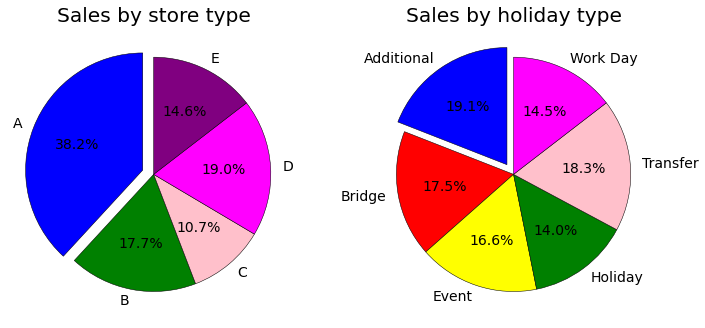

In [15]:
datah=df[["type_holiday","sales"]]
datas=df[["type_store","sales"]]



fig, axs = plt.subplots(1, 2, figsize=(10, 5))

datas=datas.groupby("type_store").mean()
datas=datas.reset_index()
plt.style.use('fivethirtyeight')
store=datas["type_store"].tolist()
plt.tight_layout()
axs[0].set_title("Sales by store type")
colors=["blue","green","pink","magenta","purple"]
explode=[0.1,0,0,0,0]
axs[0].pie(datas["sales"],labels=store,colors=colors,wedgeprops={"edgecolor":"black"},explode=explode,
           startangle=90,autopct="%1.1f%%")


datah=datah.groupby("type_holiday").mean()
datah=datah.reset_index()
plt.style.use('fivethirtyeight')
holiday=datah["type_holiday"].tolist()
plt.tight_layout()
plt.title("Sales by holiday type")
colors=["blue","red","yellow","green","pink","magenta","purple"]
explode=[0.1,0,0,0,0,0]
axs[1].pie(datah["sales"],labels=holiday,colors=colors,wedgeprops={"edgecolor":"black"},explode=explode,
        startangle=90,autopct="%1.1f%%")


plt.show()

In [16]:
top_f = df.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]

In [17]:
top_f

,family,sales
12,GROCERY I,3790.432797
3,BEVERAGES,2394.912701
30,PRODUCE,1355.373698
7,CLEANING,1074.171518
8,DAIRY,711.175991
5,BREAD/BAKERY,464.150612
28,POULTRY,351.078816
24,MEATS,341.965905
25,PERSONAL CARE,271.192381
9,DELI,265.629746


Text(0, 0.5, 'sales')

<Figure size 288x288 with 0 Axes>

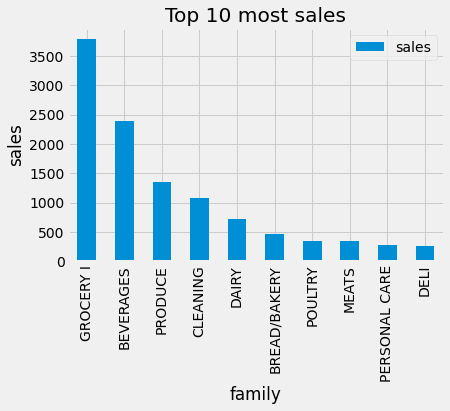

In [18]:
plt.figure(figsize=(4, 4))
top_f.plot(x='family', y='sales',kind='bar')
plt.title('Top 10 most sales')
plt.xlabel('family')
plt.ylabel('sales')

In [19]:
least_f = df.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=True)[:10]

In [20]:
least_f

,family,sales
4,BOOKS,0.070660
1,BABY CARE,0.111608
17,HOME APPLIANCES,0.457302
14,HARDWARE,1.139591
23,MAGAZINES,2.959787
31,SCHOOL AND OFFICE SUPPLIES,2.965491
2,BEAUTY,3.734269
26,PET SUPPLIES,3.950117
20,LAWN AND GARDEN,6.046491
0,AUTOMOTIVE,6.119517


<Figure size 288x288 with 0 Axes>

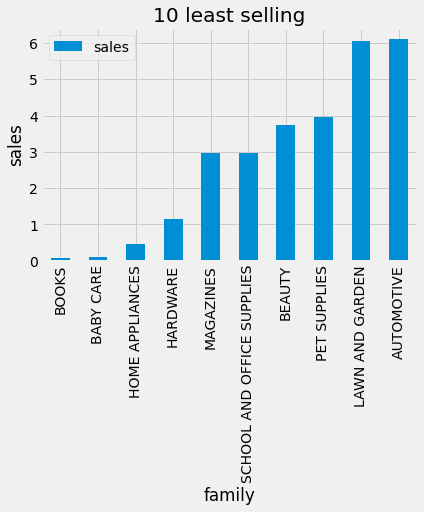

In [21]:
plt.figure(figsize=(4, 4))
least_f.plot(x='family', y='sales',kind='bar');
plt.title('10 least selling');
plt.xlabel('family');
plt.ylabel('sales');

In [22]:
# data
df_store = df.groupby('type_store').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)
df_family = df.groupby('family').agg({"sales" : "mean"}).reset_index().sort_values(by='sales', ascending=False)[:10]
df_clust = df.groupby('cluster').agg({"sales" : "mean"}).reset_index() 
# chart color
df_family['color'] = '#496595'
df_family['color'][2:] = '#c6ccd8'
df_clust['color'] = '#c6ccd8'

# chart
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3], vertical_spacing=0, horizontal_spacing=0.02,
                    subplot_titles=("Top 10 Highest Product Sales", "Highest Sales in Stores", "Clusters Vs Sales"))

fig.add_trace(go.Bar(x=df_family['sales'], y=df_family['family'], marker=dict(color= df_family['color']),
                     name='Family', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_store['sales'], labels=df_store['type_store'], name='Store type',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label'), 
                    row=1, col=2)
fig.add_trace(go.Bar(x=df_clust['cluster'], y=df_clust['sales'], 
                     marker=dict(color= df_clust['color']), name='Cluster'), 
                     row=2, col=1)
# styling
fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_clust.cluster, ticktext=[i for i in range(1,17)], row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=500, bargap=0.2,
                  margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [23]:
# data
df_month = df.groupby('month').agg({"sales" : "mean"}).reset_index()
df_month['sales'] = round(df_month['sales'],2)
df_month['month_text'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])
df_month['text'] = df_month['month_text'] + ' - ' + df_month['sales'].astype(str) 

df_week = df.groupby('week').agg({"sales" : "mean"}).reset_index() 
df_quater = df.groupby('quarter').agg({"sales" : "mean"}).reset_index() 
# chart color
df_month['color'] = '#496595'
df_month['color'][:-1] = '#c6ccd8'
df_week['color'] = '#c6ccd8'

# chart
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.08,
                    row_heights=[0.7, 0.3], 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Avg Sales Analysis", "Quarter wise Avg Sales Analysis", 
                                    "Week wise Avg Sales Analysis"))
fig.add_trace(go.Bar(x=df_month['sales'], y=df_month['month'], marker=dict(color= df_month['color']),
                     text=df_month['text'],textposition='auto',
                     name='Month', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_quater['sales'], labels=df_quater['quarter'], name='Quarter',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label+percent'), 
                     row=1, col=2)
fig.add_trace(go.Scatter(x=df_week['week'], y=df_week['sales'], mode='lines+markers', fill='tozeroy', fillcolor='#c6ccd8',
                     marker=dict(color= '#496595'), name='Week'), 
                     row=2, col=1)

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_week.week, ticktext=[i for i in range(1,53)], 
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                    margin=dict(b=0,r=20,l=20), 
                  title_text="Average Sales Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [24]:
# data
df_sh = df.groupby(['type_store','type_holiday']).agg({"sales" : "mean"}).reset_index()
df_sh['sales'] = round(df_sh['sales'], 2)

# chart
fig = px.scatter(df_sh, x='type_store', color='sales', y='type_holiday', size='sales',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title="Average Sales(Store Type Vs Holiday Type)")
# styling
fig.update_yaxes(ticksuffix='  ')
fig.update_layout(height=400, xaxis_title='', yaxis_title='',
                  margin=dict(b=0),
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=29, color='#444', family="Lato, sans-serif"),
                  font=dict(color='#555'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"))
fig.show()

In [25]:
# data
df_yms = df.groupby(['year','month','type_store']).agg({"sales" : "mean"}).reset_index()
df_yms['sales'] = round(df_yms['sales'], 2)

# chart
fig = px.scatter(df_yms, x='month', y='type_store', color='sales', size='sales', 
                 facet_row='year', title='Average Sales: Store Type Vs Year(Month)')
# styling
fig.update_yaxes(ticksuffix='  ')
fig.update_xaxes(tickmode = 'array', tickvals=[i for i in range(1,13)], 
                 ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig.update_layout(height=900, xaxis_title='', yaxis_title='',
                  margin=dict(t=70, b=0),
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=29, color='#444', family="Lato, sans-serif"),
                  font=dict(color='#555'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"))
fig.show()

In [26]:
# data
df_mh = df.groupby(['month','type_holiday']).agg({"sales" : "mean"}).reset_index()
df_mh['sales'] = round(df_mh['sales'], 2)

# chart
fig = px.scatter(df_mh, x='month', color='sales', y='type_holiday', size='sales',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 title="Average Sales: Month Vs Holiday Type")
# styling
fig.update_yaxes(ticksuffix='  ')
fig.update_xaxes(tickmode = 'array', tickvals=[i for i in range(1,13)], 
                 ticktext=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
fig.update_layout(height=400, xaxis_title='', yaxis_title='',
                  margin=dict(b=0),
                  plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                  title_font=dict(size=29, color='#444', family="Lato, sans-serif"),
                  font=dict(color='#555'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"))
fig.show()

Most of the sales were done in Transfer Holiday and that to be in Christmas Holidays month December and January and pre-Christmas November month and May month showed a great trend in shopping. Let's take a closer look towards year and holidays type with sales.

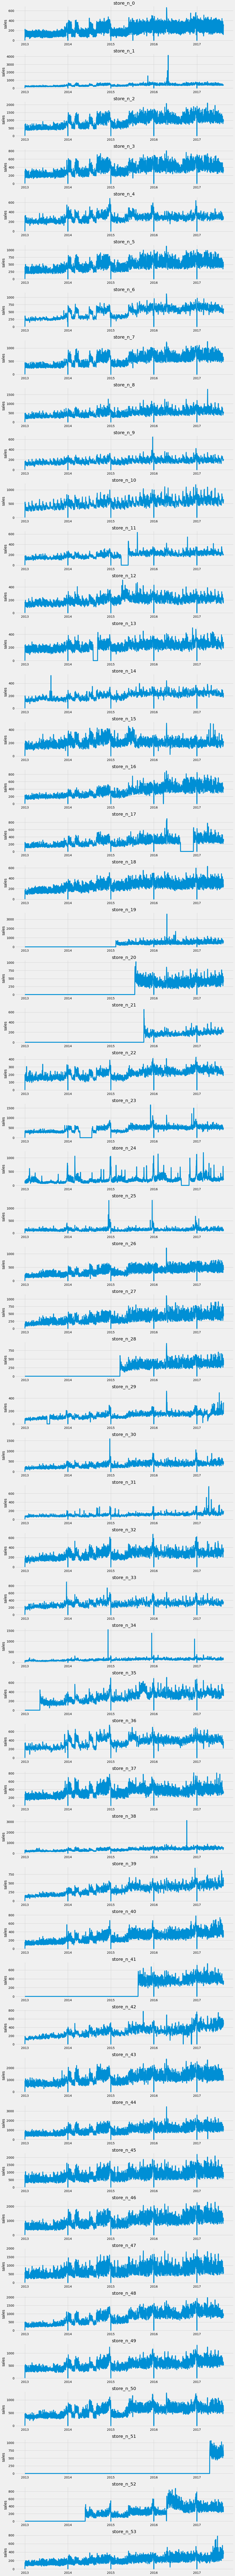

In [27]:
fig, axes = plt.subplots(54, 1, figsize=(15, 54*3))

for ax, i in zip(axes.flat, np.arange(0,54,1)):
    sns.lineplot(ax=axes[i], x=df[df.store_nbr==(i+1)].groupby(by='date')['sales'].mean().reset_index().date.values, y=df[df.store_nbr==(i+1)].groupby(by='date')['sales'].mean())
    ax.set_title(f'store_n_{i}') 
    
fig.tight_layout()